In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt

In [2]:
%matplotlib inline

In [3]:
iris.FUTURE.netcdf_promote = True

## Read data

The data of interest includes the planetary wave index (PWI) of [Irving and Simmonds (2015)](http://journals.ametsoc.org/doi/full/10.1175/JCLI-D-15-0287.1), the ZW3 index of [Raphael (2004)](http://onlinelibrary.wiley.com/doi/10.1029/2004GL020365/abstract) and a simple meridional index (MI) that is the average magnitude of the meridional wind over the interval 40-70S.

All 3 indexes were calculated using monthly timescale ERA-Interim data (it isn't a strictly fair comparison since the ZW3 index was constructed by Raphael (2004) using 3-month running mean data, but the main conclusions don't change if you account for this.)

In [4]:
pwi_file = '/g/data/r87/dbi599/data_eraint/wisconsin/pwi_va_eraint_500hPa_monthly_native.nc' 
zw3_file = '/g/data/r87/dbi599/data_eraint/wisconsin/zw3_eraint_500hPa_monthly_native.nc'
mi_file = '/g/data/r87/dbi599/data_eraint/wisconsin/mi_va_eraint_500hPa_monthly_native.nc'

In [5]:
pwi_cube = iris.load_cube(pwi_file)
zw3_cube = iris.load_cube(zw3_file)
mi_cube = iris.load_cube(mi_file)

In [6]:
print pwi_cube

planetary_wave_index / (m s**-1)    (time: 454)
     Dimension coordinates:
          time                           x
     Attributes:
          CDI: Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.6
          NCO: "4.6.3"
          history: Mon Jan 16 12:51:46 2017: /g/data/r87/dbi599/miniconda2/envs/wisconsin/bin/python...
          invalid_standard_name: planetary_wave_index
          nco_openmp_thread_number: 1
          notes: Ref: PWI of Irving and Simmonds (2015)


## Basic plot

In [7]:
def normalise(cube):
    """Normalise a timeseries"""
    
    mean = cube.data.mean()
    stdev = cube.data.std()
    
    new_cube = (cube - mean) / stdev
    
    return new_cube

In [8]:
pwi_norm = normalise(pwi_cube)
zw3_norm = normalise(zw3_cube)
mi_norm = normalise(mi_cube)

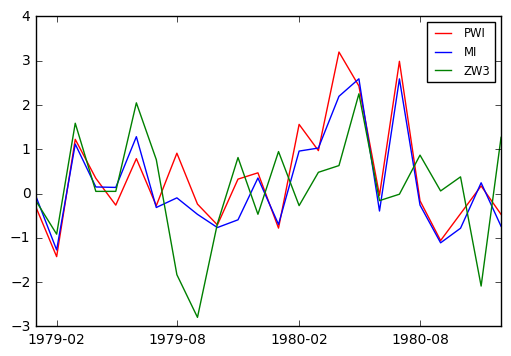

In [9]:
start = 0
end = 24

iplt.plot(pwi_norm[start: end], color='r', label='PWI') 
iplt.plot(mi_norm[start: end], color='b', label='MI')
iplt.plot(zw3_norm[start: end], color='g', label='ZW3')
plt.legend(loc=1, fontsize='small')
plt.show()

## Relationship between indices

In [10]:
from scipy.stats.stats import pearsonr

The correlation between the PWI and ZW3 index is relatively low, for the reasons explained in Irving and Simmonds (2015):

In [11]:
pearsonr(pwi_cube.data, zw3_cube.data)[0]

0.32641228571835523

One of the key findings from Irving and Simmonds (2015) is that a defining feature of highly meridional hemispheric states is an enhancement of the ZW3 component of the flow. In other words, whenever the average amplitude of the meridional wind around the hemisphere (i.e. the MI) is high, the flow invariably takes on a strong ZW3 structure. As a consequence, the MI and PWI are very strongly correlated. (i.e. for the sake of simplicity one could simply use the MI instead of the PWI)

In [12]:
pearsonr(pwi_cube.data, mi_cube.data)[0]

0.91762703541011748

(In more complex cases - like that analysed by [Irving and Simmonds (2016)](http://journals.ametsoc.org/doi/abs/10.1175/JCLI-D-15-0843.1) - a simple metric of the meridional wind isn't appropriate and the wave envelope construct used for the PWI becomes far more useful because you can isolate particular wavelengths. One of the motivations of Irving and Simmonds (2015) was to introduce the wave envelope idea in a simple case (zonal waves) before using it in more complex cases.) 

## Index behaviour

### Seasonality

As shown below, the PWI and MI have some seasonality due to the fact that the meridional wind is stronger in the SH during winter. It might be worth normalising these indices (using the monthly climatology and standard deviation), however the risk here is over-inflating the summer values. Another key finding from Irving and Simmonds (2015) is that the ZW3 pattern breaks down during summer.

In [13]:
import iris.coord_categorisation

In [14]:
def monthly_climatology(cube):
    """Calculate the monthly climatology."""
    
    iris.coord_categorisation.add_month(cube, 'time', name='month')
    monthly_clim = cube.aggregated_by(['month'], iris.analysis.MEAN)
    
    cube.remove_coord('month')
    
    return monthly_clim

In [15]:
pwi_monthly_clim = monthly_climatology(pwi_cube)
mi_monthly_clim = monthly_climatology(mi_cube)

In [16]:
print pwi_monthly_clim

planetary_wave_index / (m s**-1)    (-- : 12)
     Auxiliary coordinates:
          month                         x
          time                          x
     Attributes:
          CDI: Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.6
          NCO: "4.6.3"
          history: Mon Jan 16 12:51:46 2017: /g/data/r87/dbi599/miniconda2/envs/wisconsin/bin/python...
          invalid_standard_name: planetary_wave_index
          nco_openmp_thread_number: 1
          notes: Ref: PWI of Irving and Simmonds (2015)
     Cell methods:
          mean: month


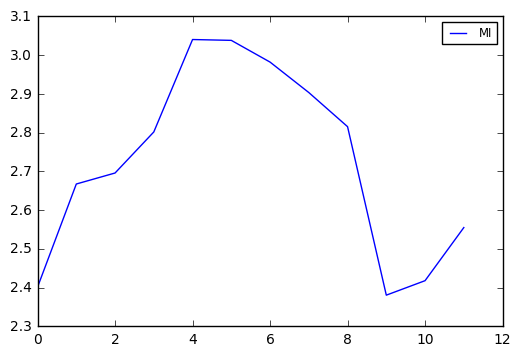

In [20]:
#iplt.plot(pwi_monthly_clim, color='r', label='PWI') 
iplt.plot(mi_monthly_clim, color='b', label='MI')
plt.legend(loc=1, fontsize='small')
plt.show()